# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

#/ Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q 
##--user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Tree-based models
from sklearn.linear_model import LogisticRegression  # Logistic regression for baseline
from xgboost import XGBClassifier  # XGBoost for boosting performance


In [2]:
# For bold text in print statements
from rich.console import Console
from rich import print

console = Console()

## Data Overview

- Observations
- Sanity checks

In [3]:
df = pd.read_csv('INNHotelsGroup.csv')


In [4]:
df.head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


### Dimensions, Col names & Data types

In [5]:
# Check dimensions, column names
console.print(
    '[bold]Dataframe Shape:[/bold]\n',df.shape,'\n',
    '[bold]Columns:[/bold]\n',df.columns,'\n')

Dataframe Shape:

(36275, 19)

 Columns:
 Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# Define colors for each data type
type_colors = {
    "object": "green",
    "int64": "red",
    "float64": "magenta"
}

# Determine the max width for alignment
max_col_width = max(len(column) for column in df.columns) + 2 # Add padding

# Build a single formatted string with alignment
output = "\n".join(
    f"{column.ljust(max_col_width)} [{type_colors.get(str(dtype), 'white')}] {dtype} [/]"
    for column, dtype in zip(df.columns, df.dtypes)
)

# Print everything at once
console.print('[bold]Data Type: [/bold]\n',output)

Data Type: 
 Booking_ID                              object 
no_of_adults                            int64 
no_of_children                          int64 
no_of_weekend_nights                    int64 
no_of_week_nights                       int64 
type_of_meal_plan                       object 
required_car_parking_space              int64 
room_type_reserved                      object 
lead_time                               int64 
arrival_year                            int64 
arrival_month                           int64 
arrival_date                            int64 
market_segment_type                     object 
repeated_guest                          int64 
no_of_previous_cancellations            int64 
no_of_previous_bookings_not_canceled    int64 
avg_price_per_room                      float64 
no_of_special_requests                  int64 
booking_status                          object 

### Missing Values & Duplicates

In [7]:
console.print('[bold]Missing Values:[/bold]\n', df.isnull().sum(),'\n',
              '\n[bold]Duplicated Rows:[/bold]', df.duplicated().sum())

Missing Values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64 
 
Duplicated Rows: 0

### Summary Statistics

In [8]:
# Numerical Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
# Categorical Statistics
df.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [10]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Histogram, Boxplot & Correlation Heatmap

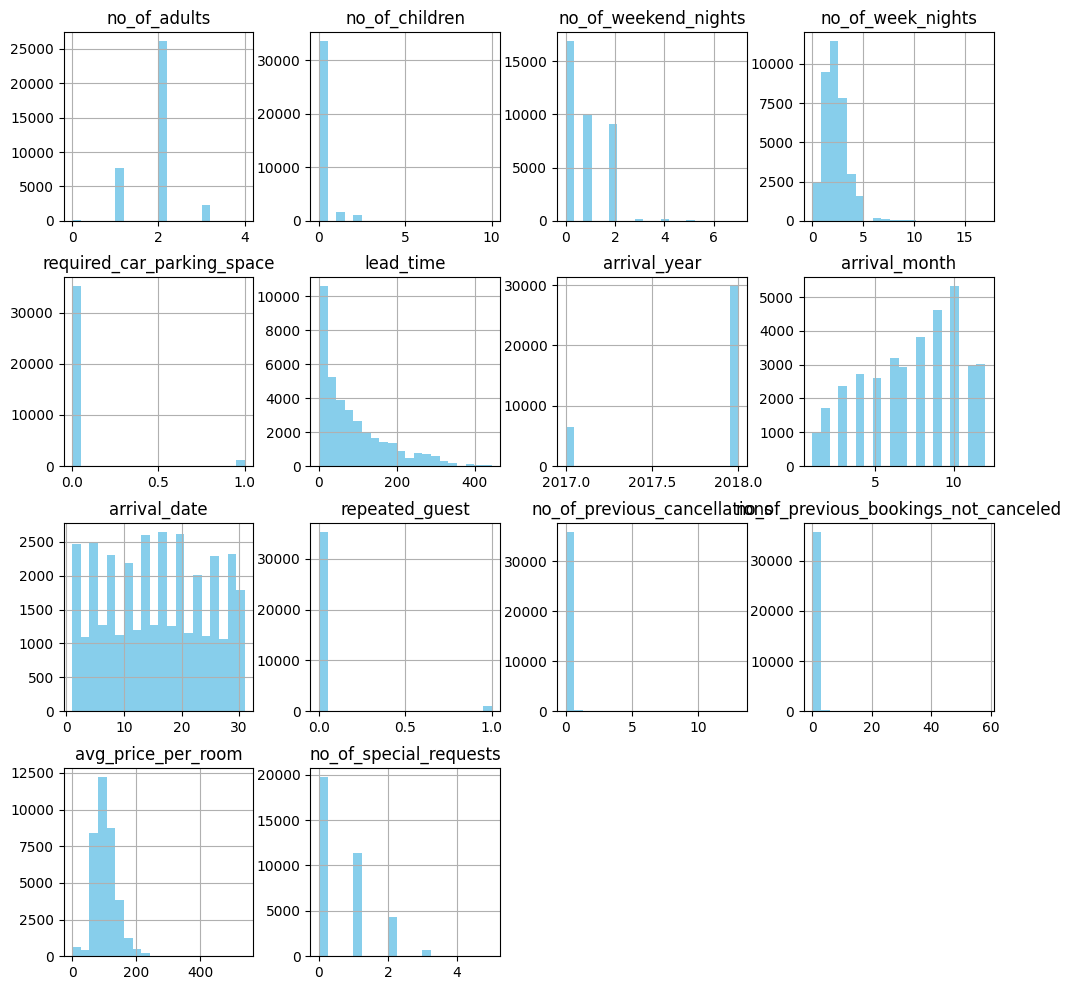

In [11]:
# Histogram to see the distribution of numerical features
df.hist(figsize=(12, 12), bins=20, color='skyblue')
plt.show()

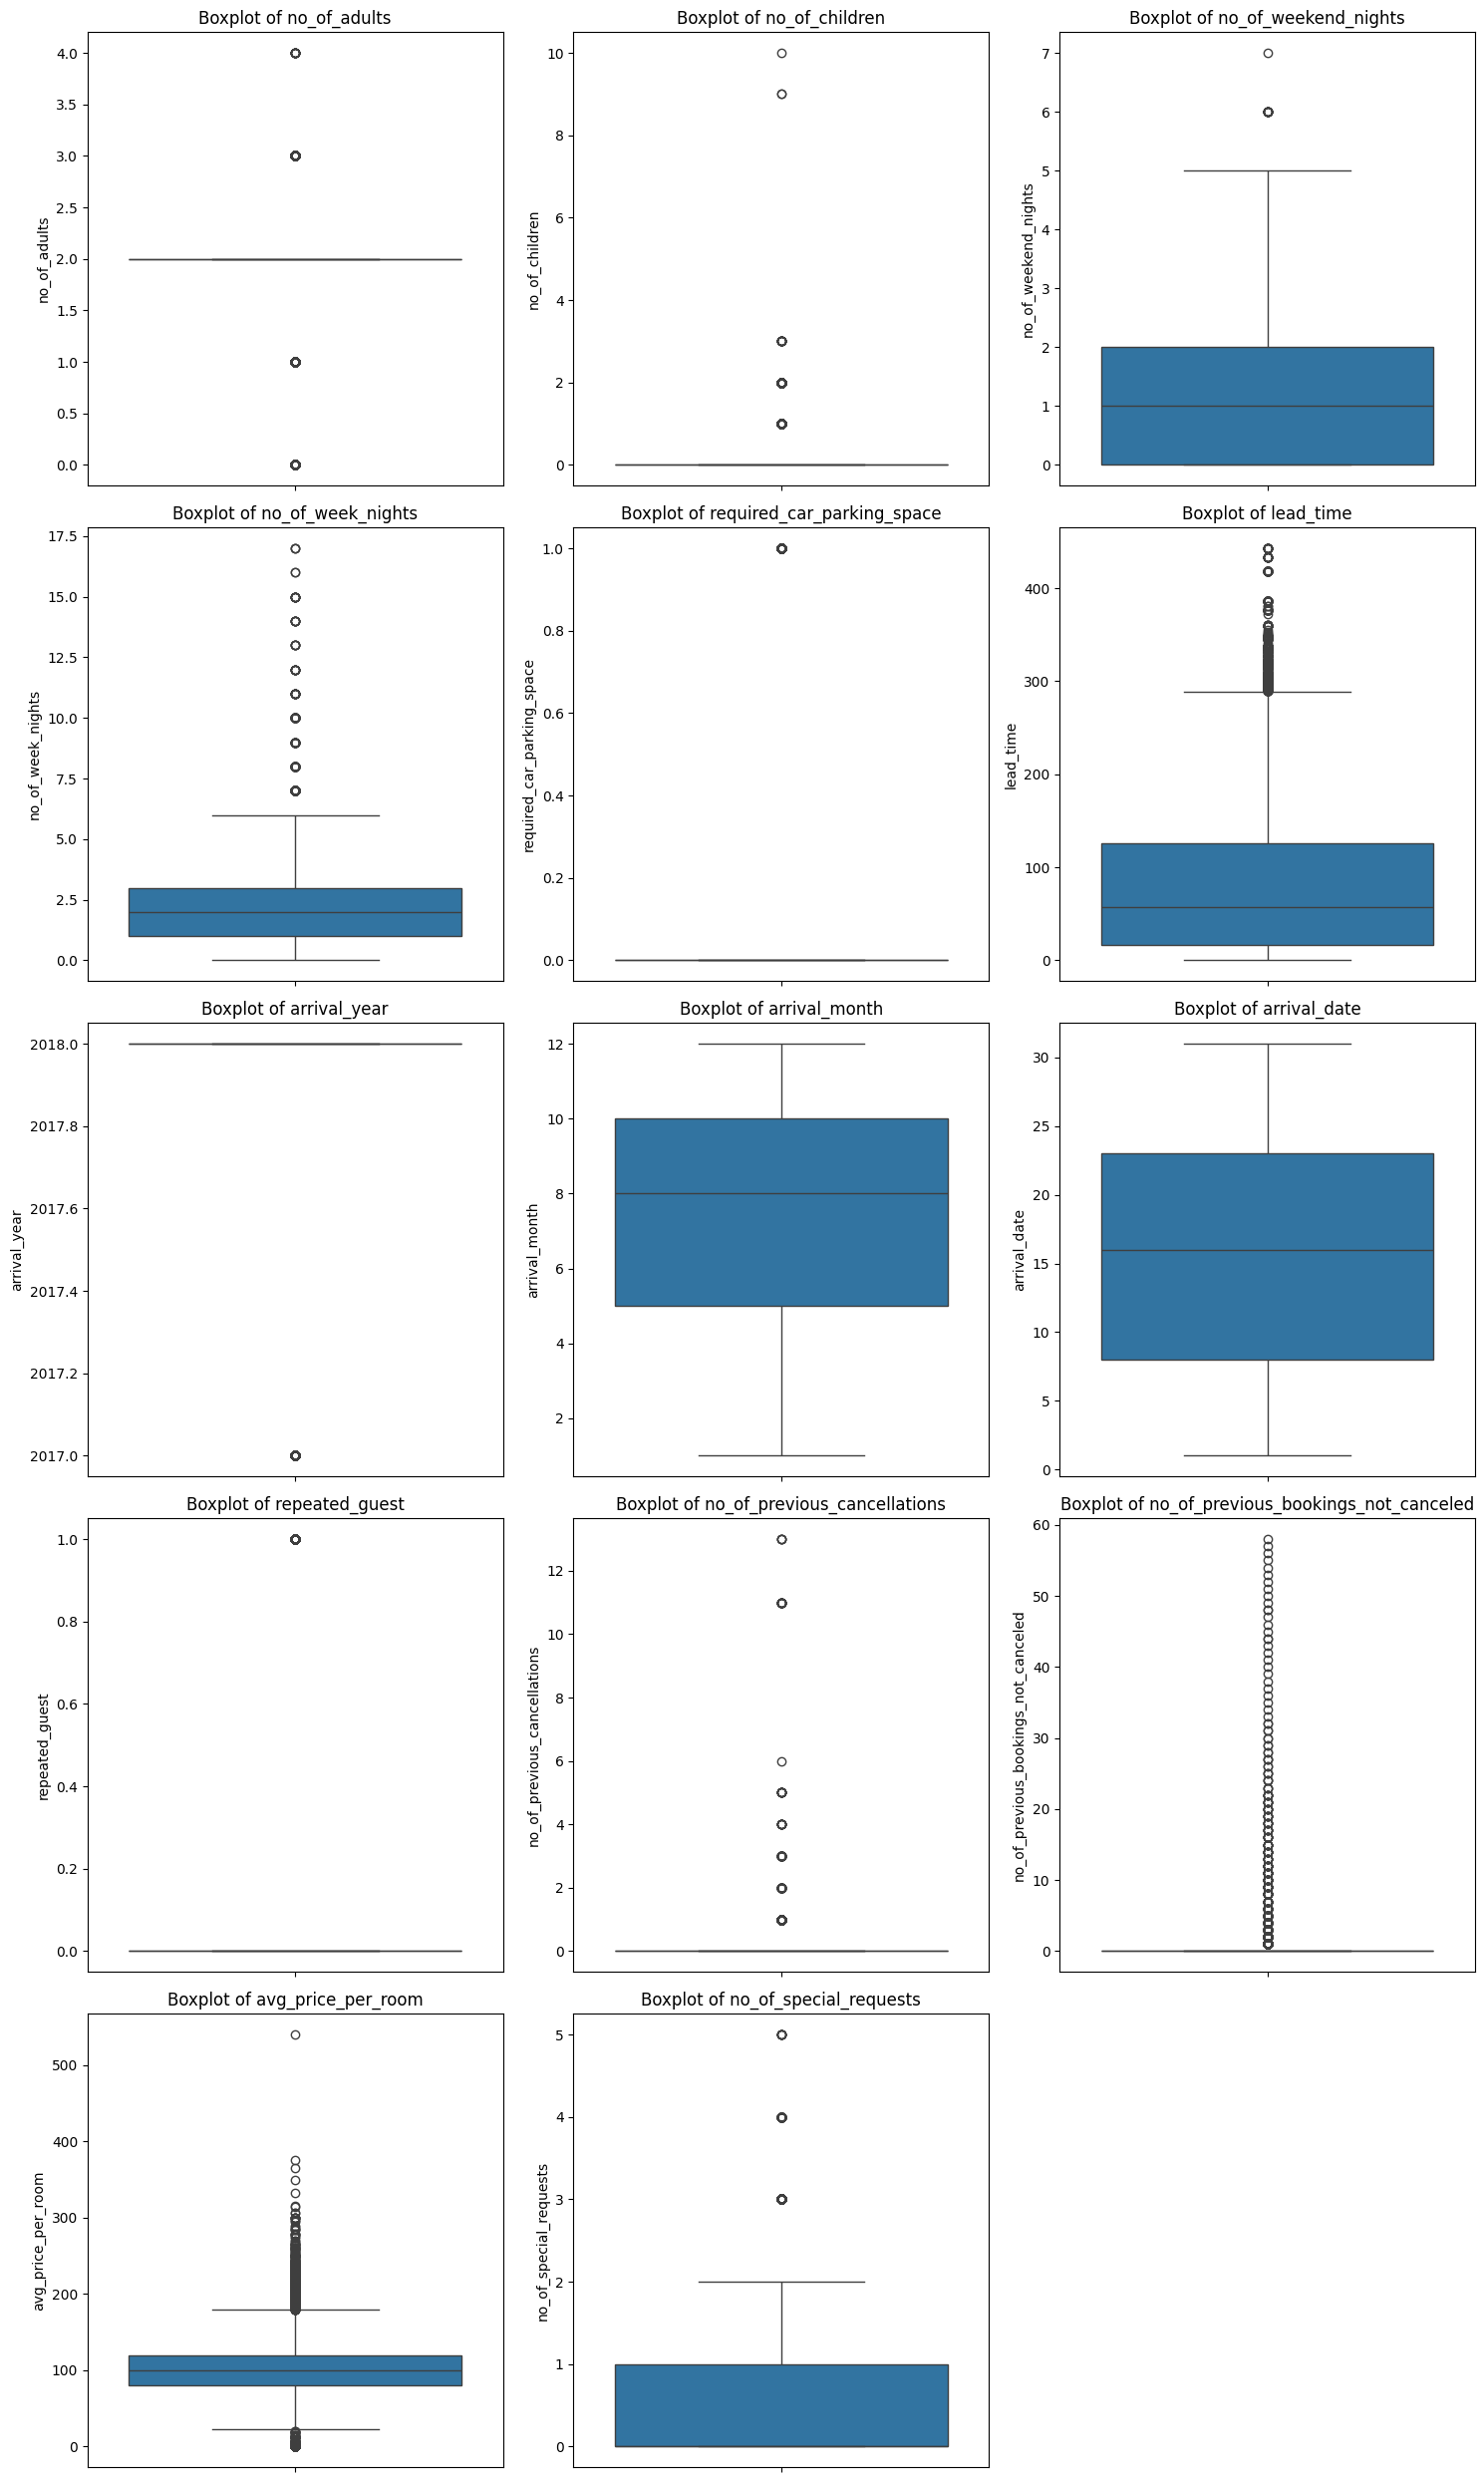

In [12]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Define the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column as a boxplot
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Note:
    
    To include boolean variables in the heatmap some data types must be changed

In [13]:
# dtype change to bool
df['required_car_parking_space'] = df['required_car_parking_space'].astype(bool)
df['repeated_guest'] = df['repeated_guest'].astype(bool)
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0}).astype(bool)


    Arrival year month and date must be arranged into proper date format

In [14]:
df['arrival_datetime'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].rename(columns={
    'arrival_year': 'year', 
    'arrival_month': 'month', 
    'arrival_date': 'day'
}), errors='coerce')

In [15]:
df[df['arrival_datetime'].isna()][['arrival_year', 'arrival_month', 'arrival_date']].head(2)

,arrival_year,arrival_month,arrival_date
2626,2018,2,29
3677,2018,2,29


In [16]:
# Drop columns for year month and date that are no longer needed
df.drop(columns=['arrival_year', 'arrival_month', 'arrival_date'], inplace=True)

- Note:

        Some bookings are on dates that do not exist

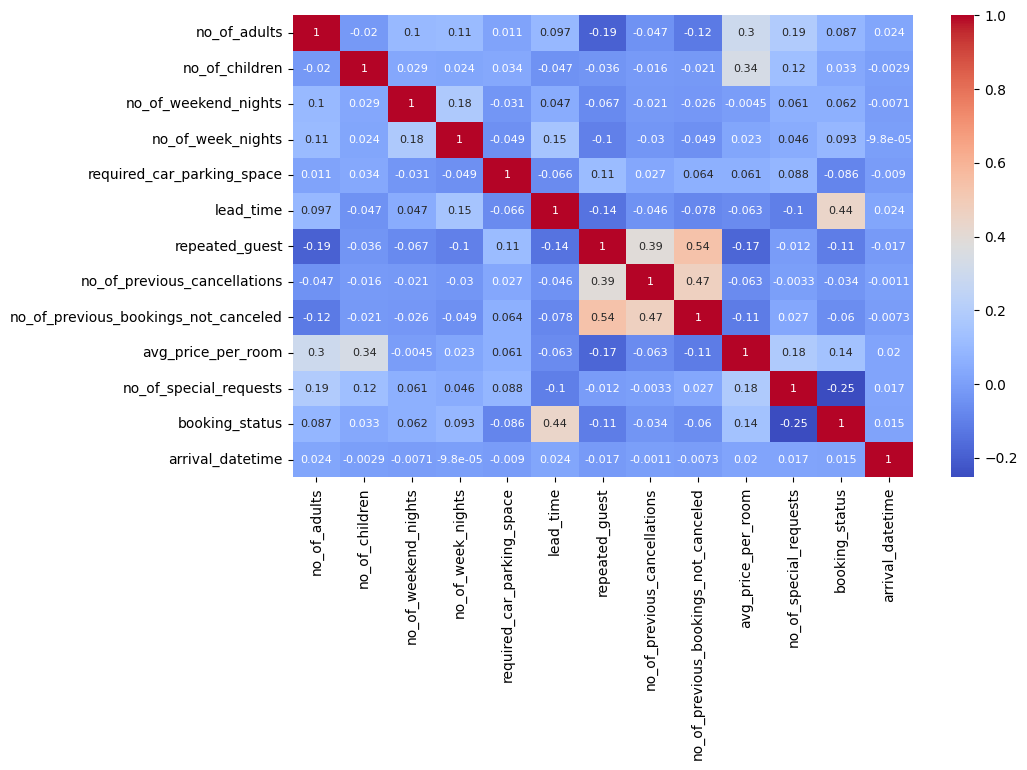

In [17]:
numerical_bool_df = df.select_dtypes(include=[np.number,bool, 'datetime64']).copy()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_bool_df.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

- Analysis:

    __lead_time__ (0.44): Longer lead times (time between booking and arrival) are positively correlated with cancellations.

    __no_of_special_requests__ (-0.25): The negative correlation suggests that more special requests are associated with fewer cancellations.

    __repeated_guest__ (-0.12): Repeated guests are less likely to cancel.
    
    __no_of_previous_bookings_not_canceled__ (-0.11): More previous successful bookings indicate a lower likelihood of cancellations.

    __required_car_parking_space__ (-0.086): Guests needing parking spaces are slightly less likely to cancel.

### Plot date vs bookings


In [18]:
df.rename(columns={'arrival_datetime': 'arrival_date'}, inplace=True)

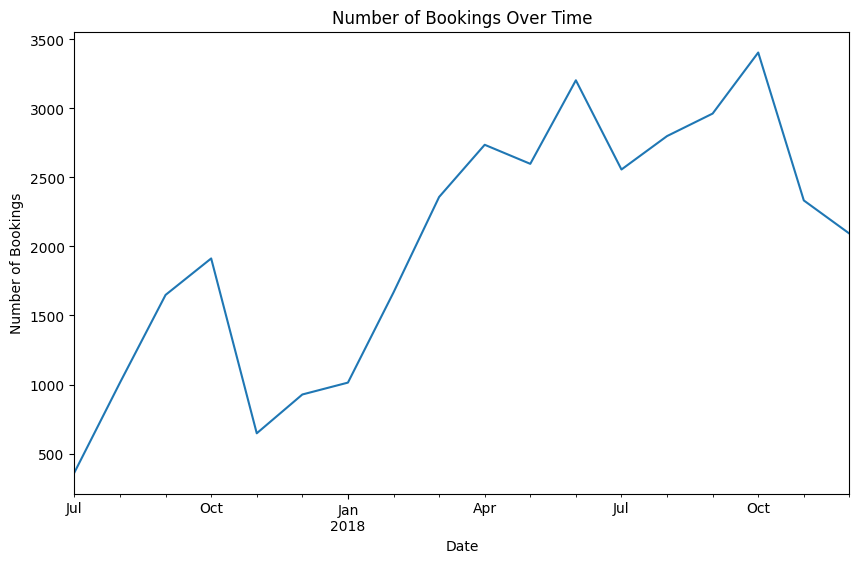

In [19]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Group by month and year
monthly_bookings = df.groupby(pd.Grouper(key='arrival_date', freq='ME'))['booking_status'].count()

# Plot
plt.figure(figsize=(10, 6))
monthly_bookings.plot()
plt.title('Number of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

1. What are the busiest months in the hotel?

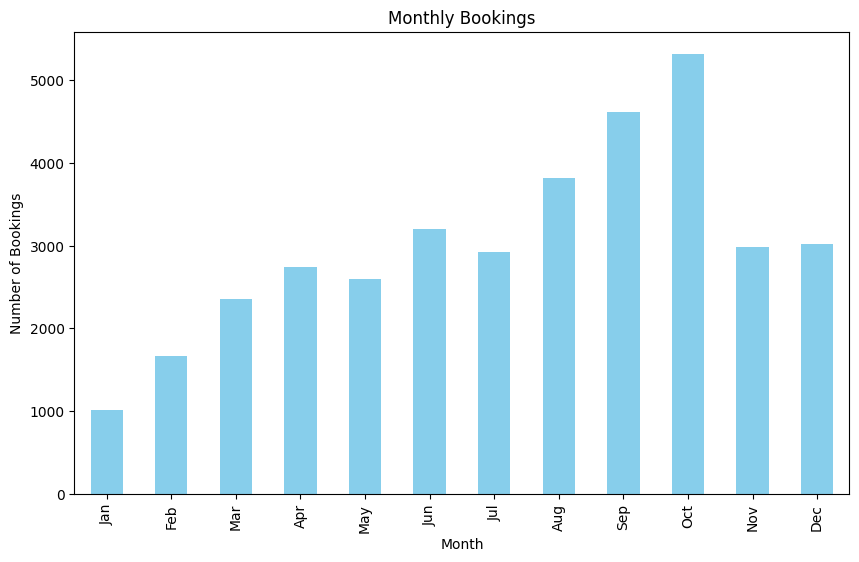

In [20]:
# Extract month from arrival_date
df['arrival_month'] = df['arrival_date'].dt.month

# Count bookings per month
monthly_bookings = df['arrival_month'].value_counts().sort_index()

# Visualize
monthly_bookings.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Monthly Bookings")
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


2. Which market segment do most of the guests come from?

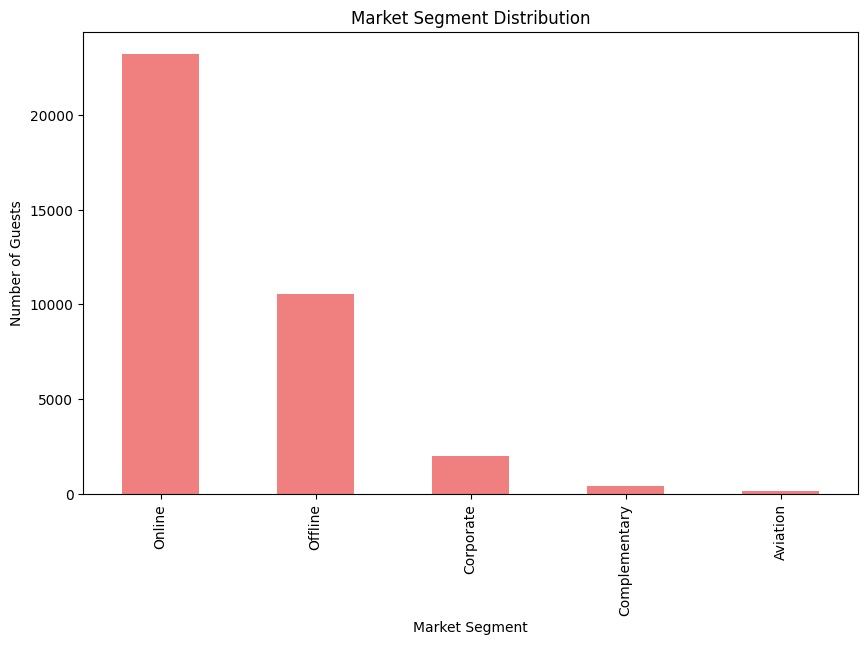

In [21]:
# Count bookings per market segment
market_segment_counts = df['market_segment_type'].value_counts()

# Visualize
market_segment_counts.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title("Market Segment Distribution")
plt.ylabel("Number of Guests")
plt.xlabel("Market Segment")
plt.show()

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

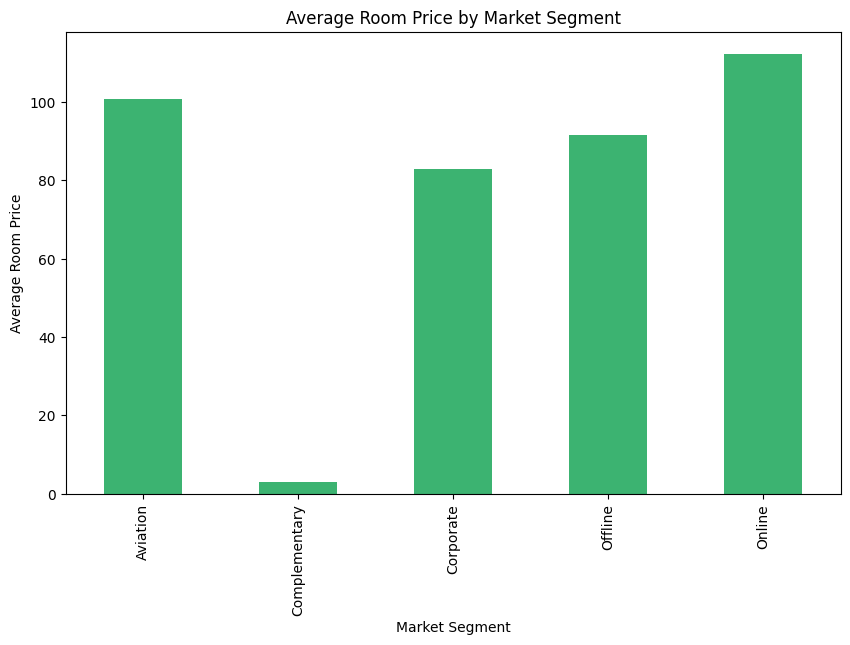

In [22]:
# Average room price per market segment
avg_price_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean()

# Visualize
avg_price_by_segment.plot(kind='bar', figsize=(10, 6), color='mediumseagreen')
plt.title("Average Room Price by Market Segment")
plt.ylabel("Average Room Price")
plt.xlabel("Market Segment")
plt.show()

4. What percentage of bookings are canceled?

In [23]:
# Booking status distribution numeric column
df['booking_status_numeric'] = df['booking_status'].astype(int)

In [24]:
# Calculate cancellation rate
cancellation_rate = df['booking_status_numeric'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 32.76%

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [25]:
# Filter for repeating guests
repeating_guests = df[df['repeated_guest'] == 1]

# Calculate cancellation rate for repeating guests
repeating_guest_cancellation_rate = repeating_guests['booking_status_numeric'].mean() * 100
print(f"Cancellation Rate for Repeating Guests: {repeating_guest_cancellation_rate:.2f}%")

# Filter for non-repeating guests
first_time_guests = df[df['repeated_guest'] == 0]

# Calculate cancellation rate for first-time guests
first_time_guest_cancellation_rate = first_time_guests['booking_status_numeric'].mean() * 100
print(f"Cancellation Rate for First-Time Guests: {first_time_guest_cancellation_rate:.2f}%")

Cancellation Rate for Repeating Guests: 1.72%

Cancellation Rate for First-Time Guests: 33.58%

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

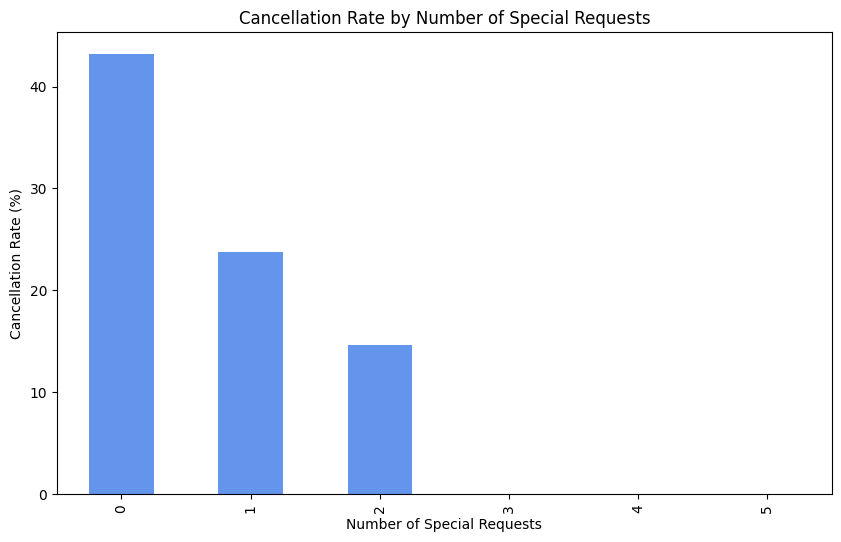

In [26]:
# Group by number of special requests and calculate cancellation rate
special_request_cancellation = df.groupby('no_of_special_requests')['booking_status_numeric'].mean() * 100

# Visualize
special_request_cancellation.plot(kind='bar', figsize=(10, 6), color='cornflowerblue')
plt.title("Cancellation Rate by Number of Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Number of Special Requests")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [27]:
missing_values = df.isnull().sum()[lambda x: x > 0]
print(missing_values)
df.dropna(inplace=True)

arrival_date     37
arrival_month    37
dtype: int64

- Note:

        Although the date and month appear to have small correlation to cancelation rates I will still drop the missing values due to these reservations not being reliable

### Feature Engineering

In [28]:
# Apply log transformation (add 1 to avoid log(0))
df['lead_time_log'] = np.log1p(df['lead_time'])
df['avg_price_per_room_log'] = np.log1p(df['avg_price_per_room'])

In [29]:
# Total Stay column
df['total_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [30]:
# Column for Season
df['season'] = df['arrival_month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
df = pd.get_dummies(df, columns=['season'], drop_first=True)

In [31]:
# Indicator for special requests
df['has_special_requests'] = (df['no_of_special_requests'] > 0).astype(int)

### Hot-one enconding

In [32]:
hotone_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df = pd.get_dummies(df, columns=hotone_cols, drop_first=True)

### Outliers detection and handling

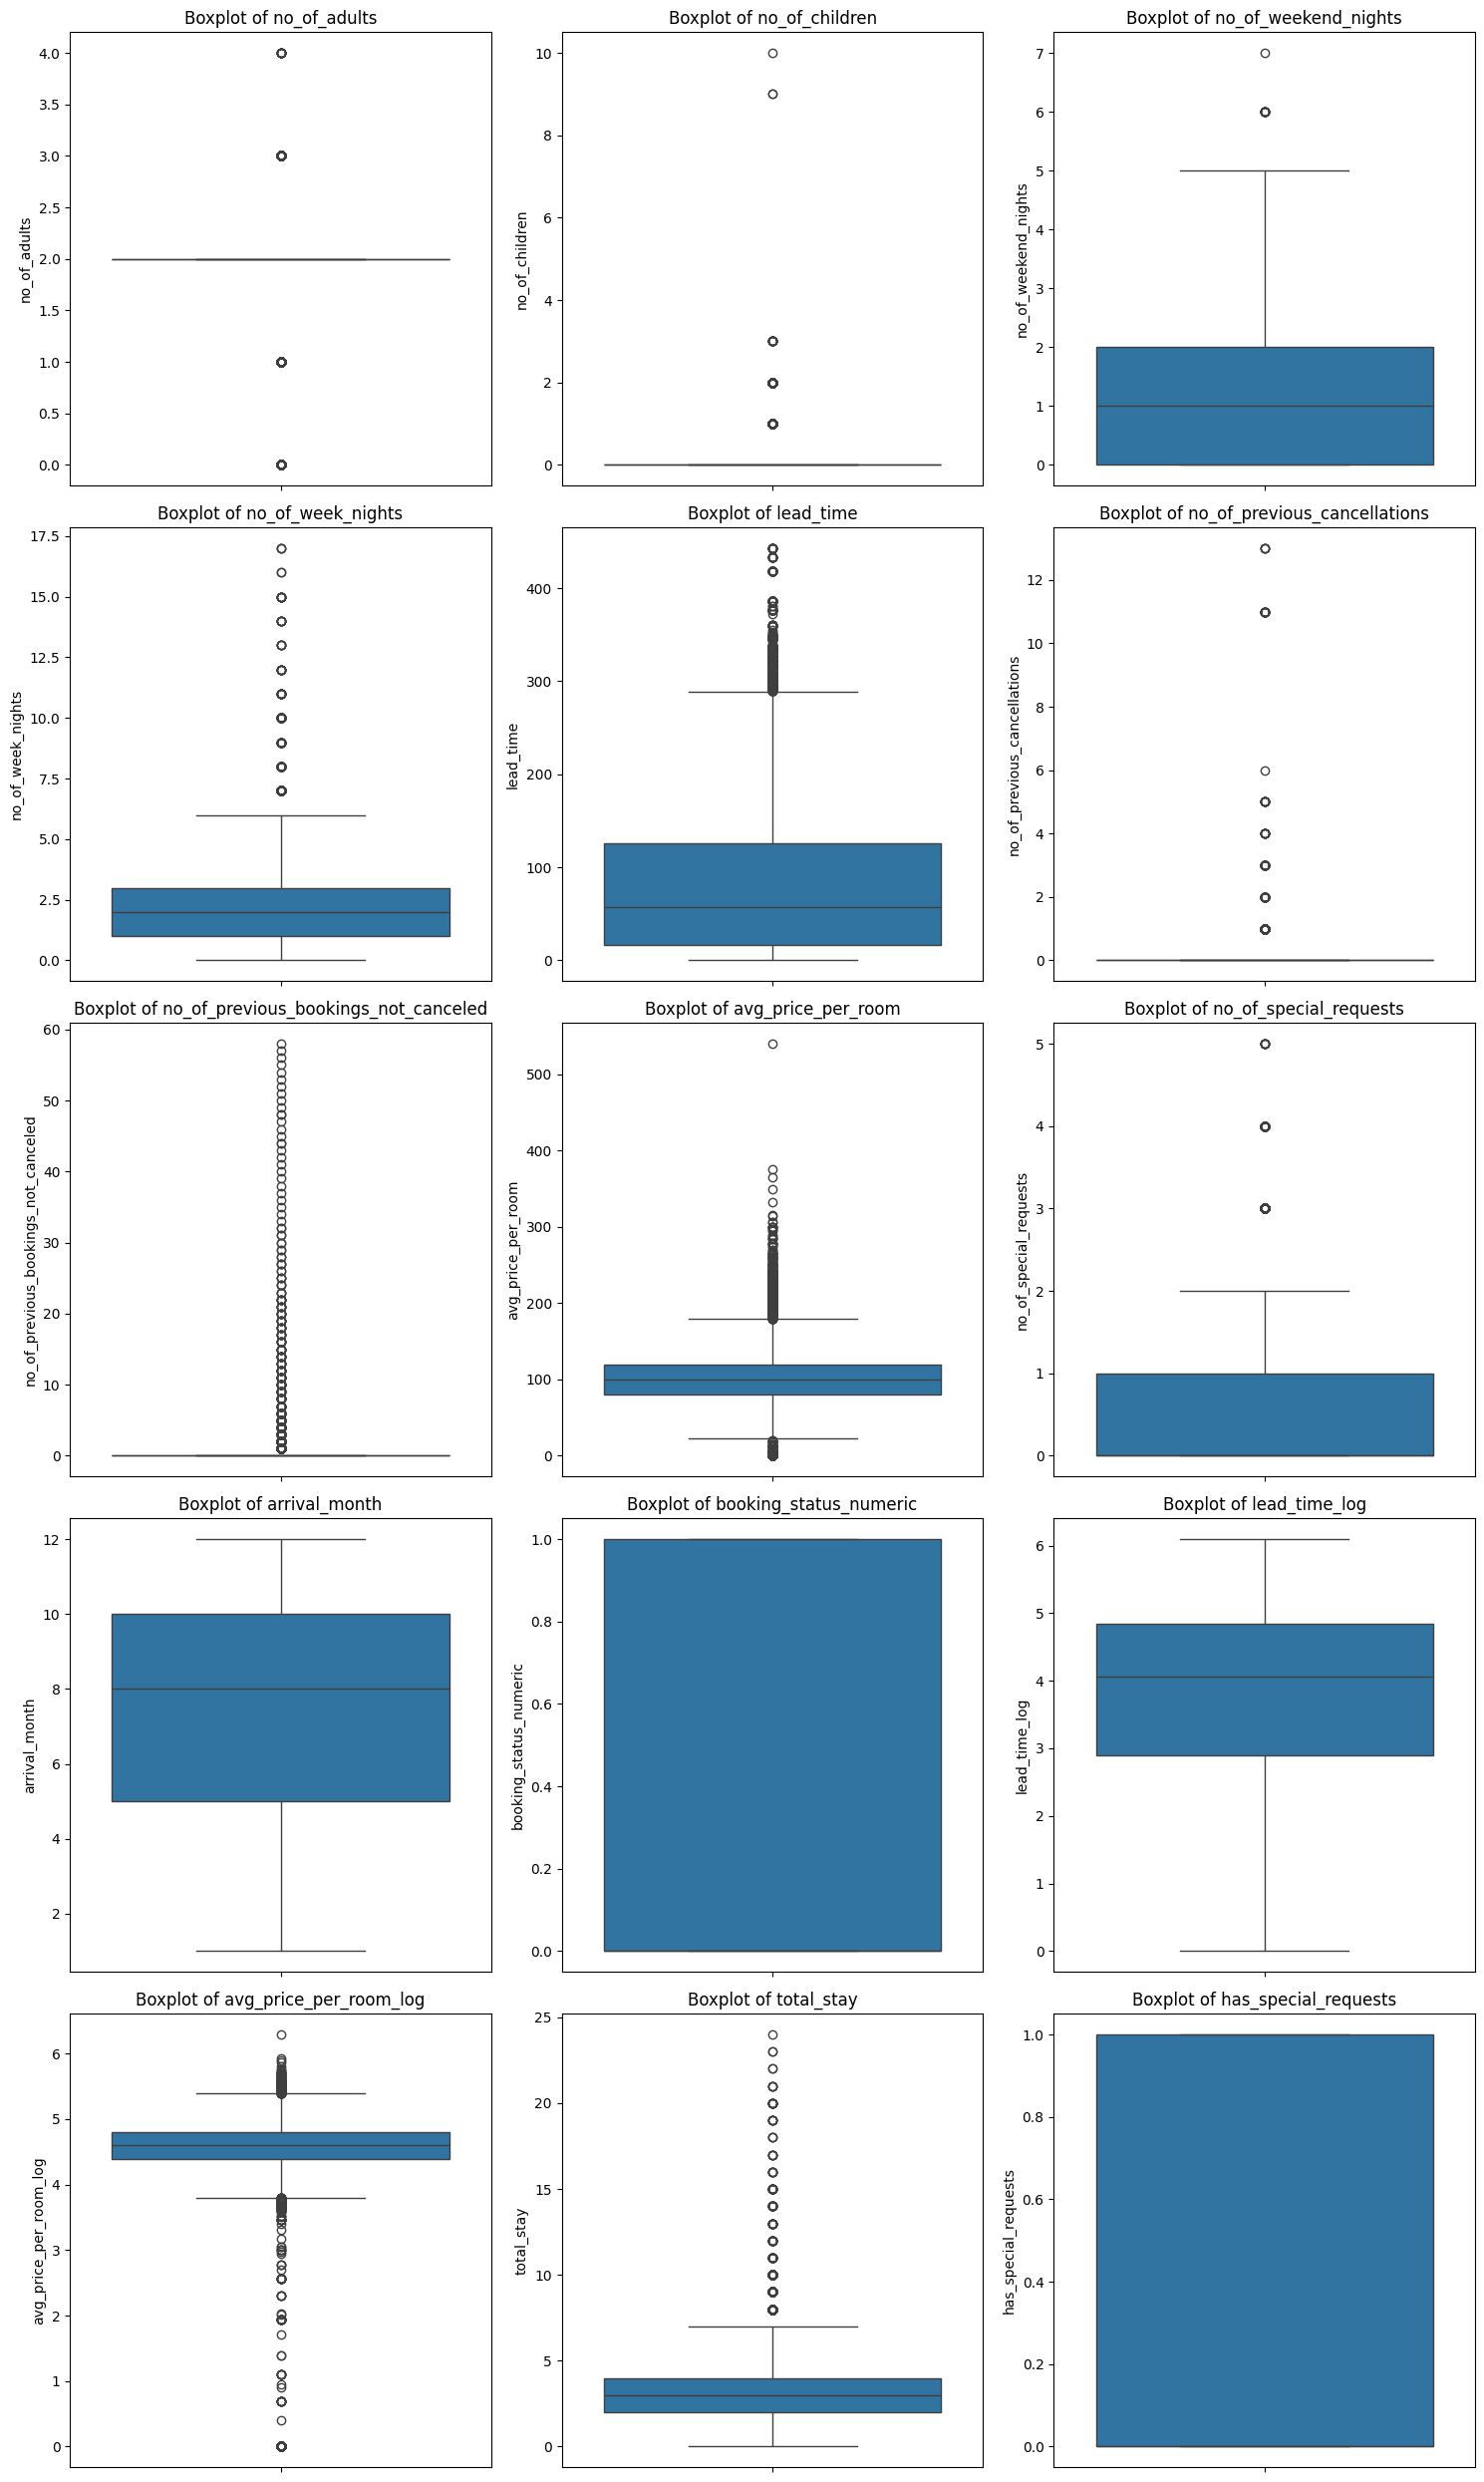

In [33]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Define the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column as a boxplot
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### High Relevance Variables

- __lead_time__ (high correlation with booking_status_numeric and many outliers)
- __no_of_special_requests__ (moderate correlation)
- __avg_price_per_room__ (important for business insights and has many outliers)
- __total_stay__ (newly created and potentially impactful)

__lead_time__ probably indicates early planners and should not be removed

__avg_price_per_room__ indicates luxury bookings and wont be removed

- __no_of_adults__ has values in 0 which should not be possible and will be removed

In [34]:
# Remove no_of_adults with value 0
df = df[df['no_of_adults'] > 0]

## EDA

- It is a good idea to explore the data once again after manipulating it.

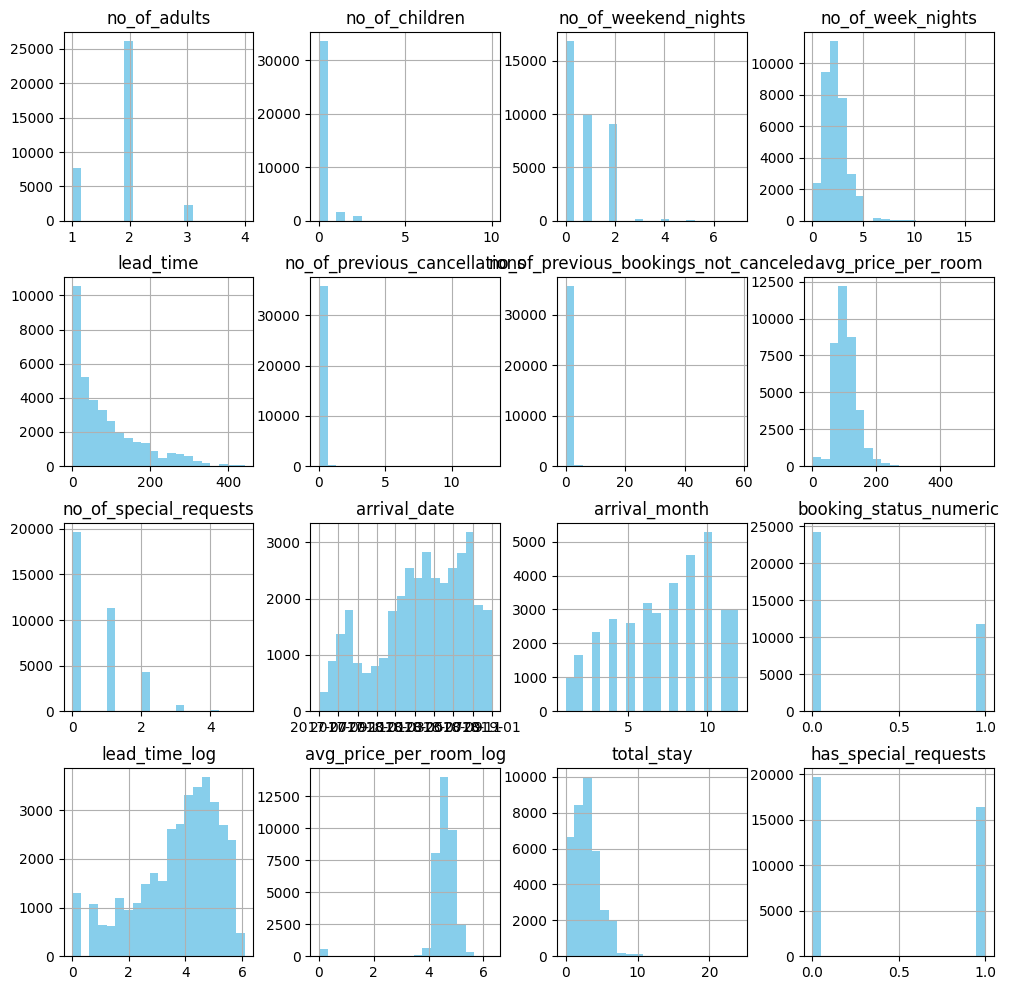

In [35]:
# Histogram to see the distribution of numerical features
df.hist(figsize=(12, 12), bins=20, color='skyblue')
plt.show()

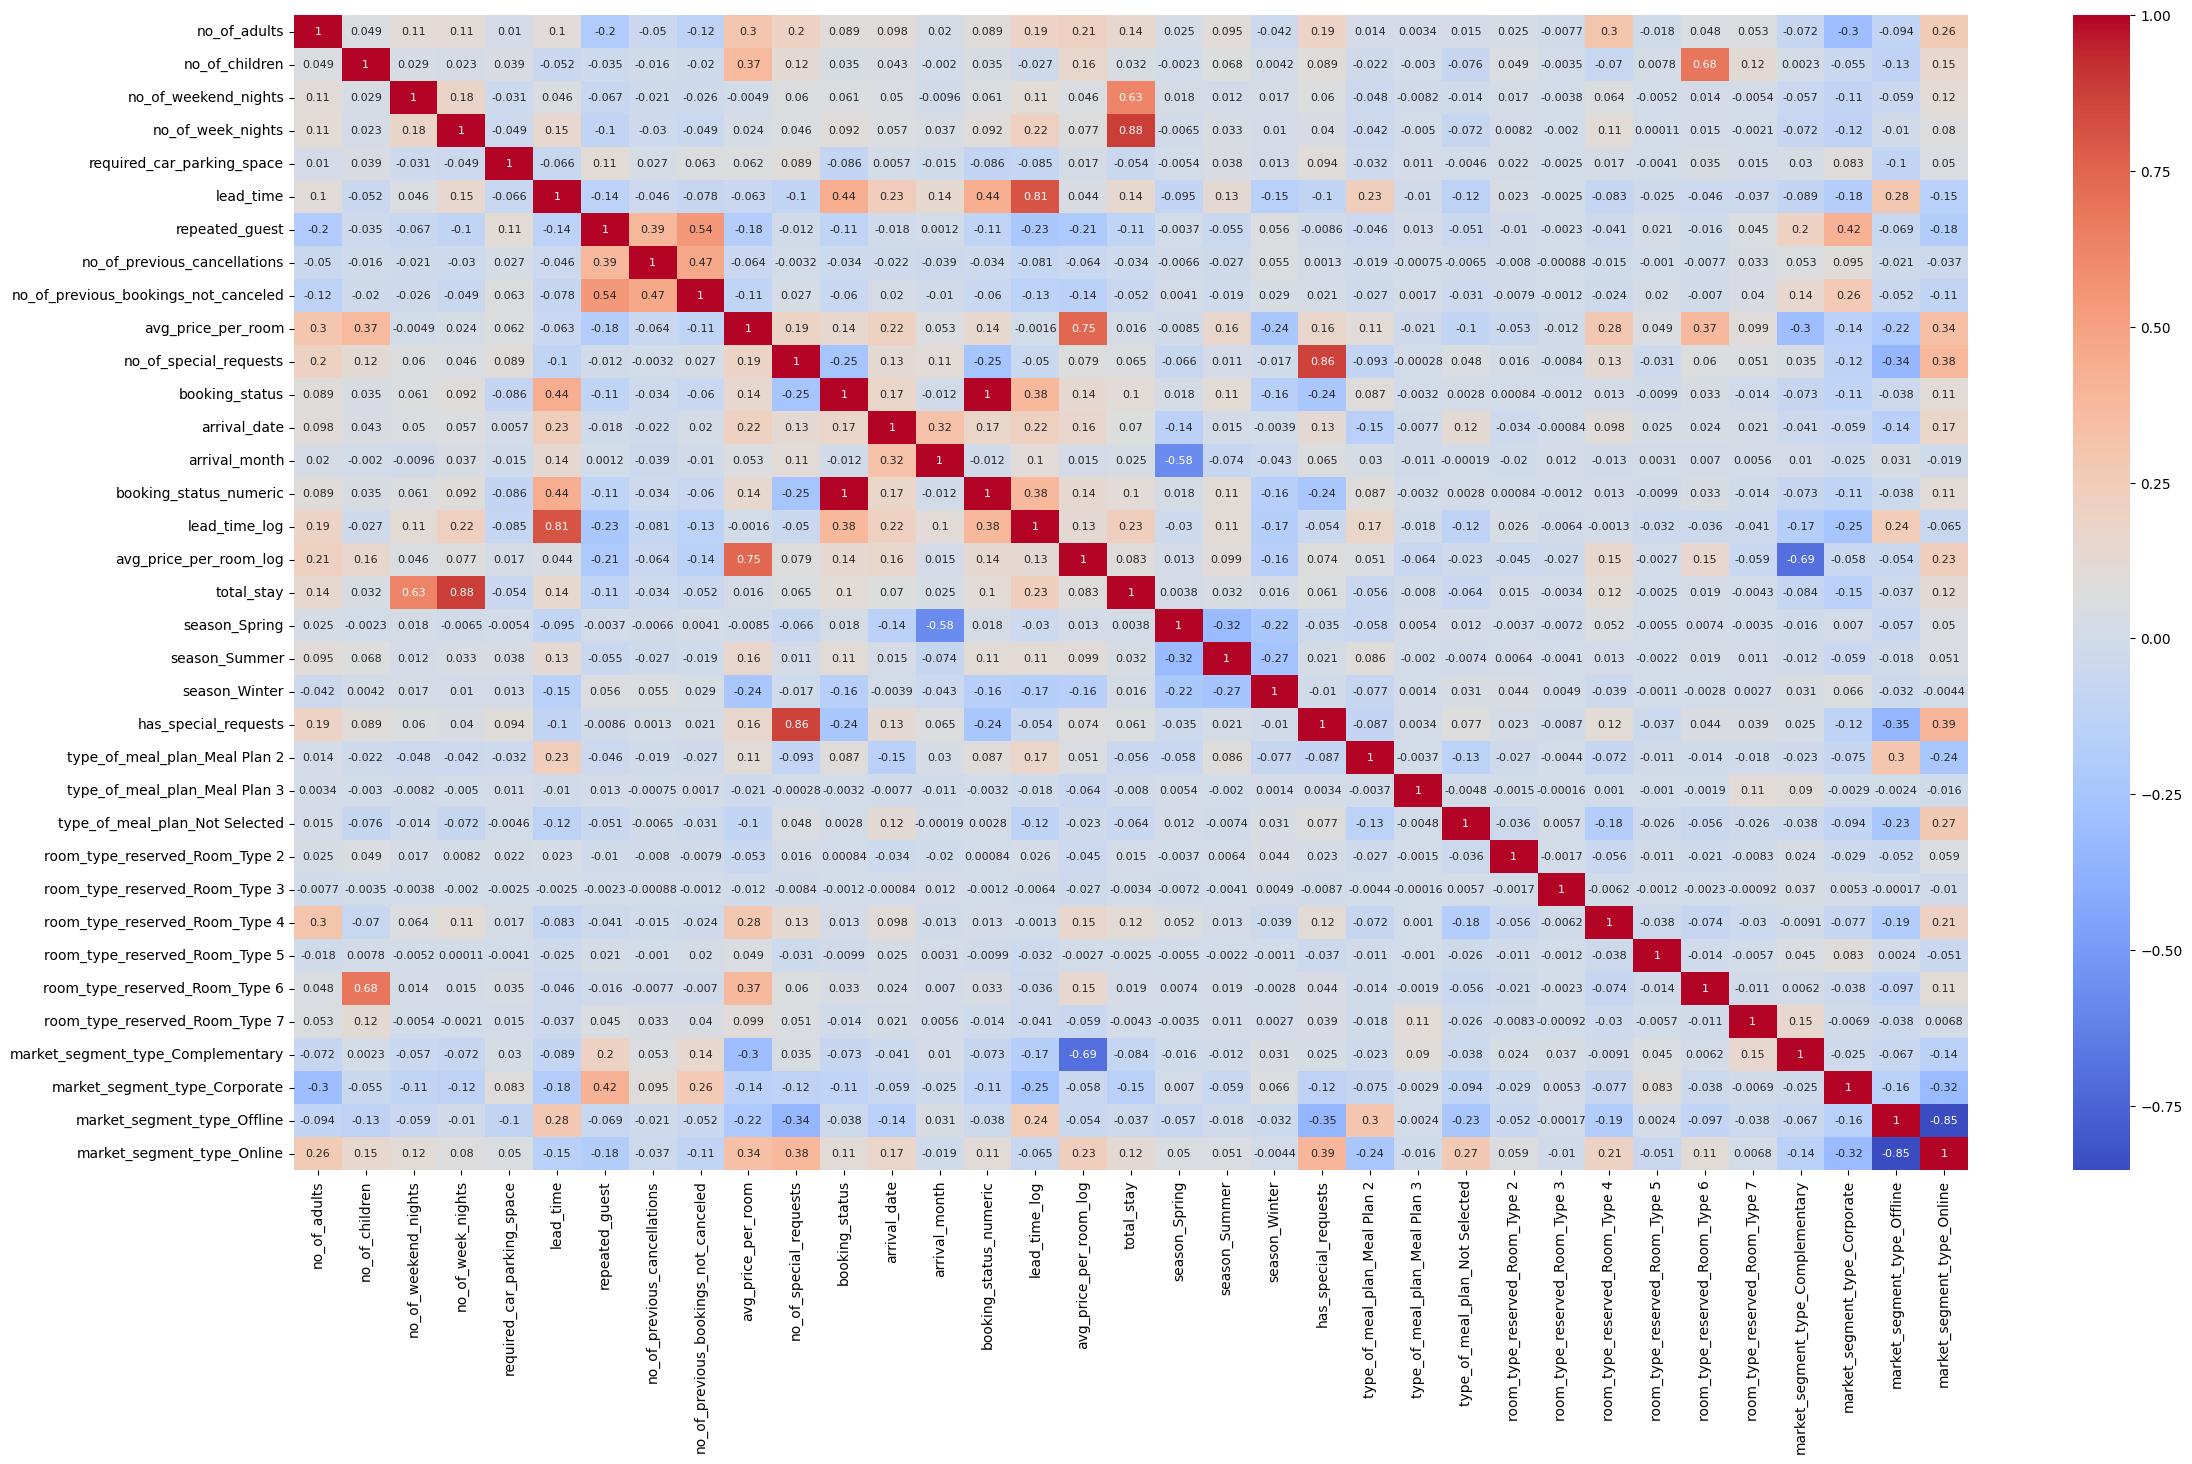

In [36]:
numerical_bool_df = df.select_dtypes(include=[np.number,bool, 'datetime64']).copy()

# Correlation heatmap
plt.figure(figsize=(27, 15))
sns.heatmap(numerical_bool_df.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

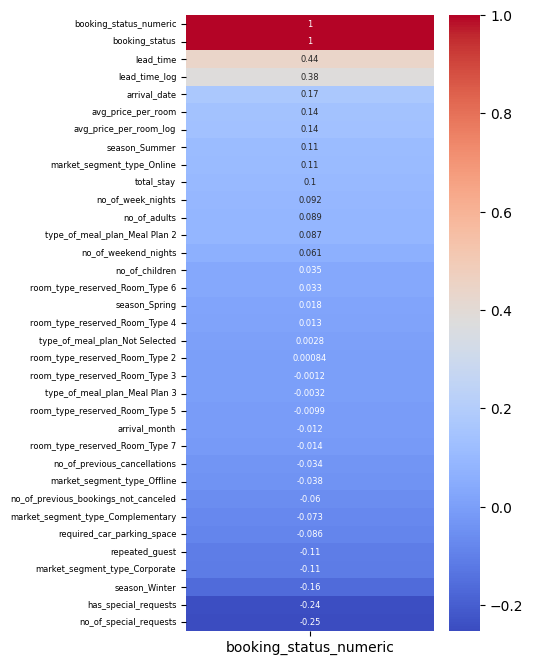

In [37]:
# heatmap for only booking_status
plt.figure(figsize=(4,8))
sns.heatmap(numerical_bool_df.corr()[['booking_status_numeric']].sort_values(by='booking_status_numeric', ascending=False), 
            annot=True, cmap="coolwarm", annot_kws={"size": 6})

plt.yticks(fontsize=6)
plt.show()

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [38]:
# VIF is a measure of multicollinearity among the independent variables within a regression model.
# this will help us to identify the features that are highly correlated with each other
# and ensure there is no multicollinearity in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Steps to Test for Multicollinearity Using VIF

Import Required Libraries:

Use statsmodels to calculate VIF values for each feature.

- Calculate VIF:

VIF values are calculated for numerical features (including dummy variables) but not for categorical variables directly.

Interpret VIF Values:

        VIF < 5: Low multicollinearity (acceptable).
        VIF 5–10: Moderate multicollinearity (needs attention).
        VIF > 10: High multicollinearity (problematic; consider removing the feature).


In [39]:
# Dropping perfect collinearity columns
df.drop(columns={'booking_status_numeric'}, inplace=True)
# drop id column
df.drop(columns={'Booking_ID'}, inplace=True)
# drop week and weekend nights in place of total stay
df.drop(columns={'no_of_weekend_nights', 'no_of_week_nights'}, inplace=True)

In [40]:
# Select only numerical features (including dummy variables)
features_to_include = df.select_dtypes(include=['float64', 'int64', 'bool'])

X = features_to_include

In [44]:
# Check data types of the columns
non_numeric_cols = ~X.dtypes.isin(['int64', 'float64', 'bool'])
console.print(non_numeric_cols[non_numeric_cols])

# if nothing is printed, then all columns are numeric or boolean

no_of_adults                            True
no_of_children                          True
required_car_parking_space              True
lead_time                               True
repeated_guest                          True
no_of_previous_cancellations            True
no_of_previous_bookings_not_canceled    True
avg_price_per_room                      True
no_of_special_requests                  True
booking_status                          True
arrival_month                           True
lead_time_log                           True
avg_price_per_room_log                  True
total_stay                              True
season_Spring                           True
season_Summer                           True
season_Winter                           True
has_special_requests                    True
type_of_meal_plan_Meal Plan 2           True
type_of_meal_plan_Meal Plan 3           True
type_of_meal_plan_Not Selected          True
room_type_reserved_Room_Type 2          True
room_type_reserved_Room_Type 3          True
room_type_reserved_Room_Type 4          True
room_type_reserved_Room_Type 5          True
room_type_reserved_Room_Type 6          True
room_type_reserved_Room_Type 7          True
market_segment_type_Complementary       True
market_segment_type_Corporate           True
market_segment_type_Offline             True
market_segment_type_Online              True
dtype: bool

In [45]:
# Select only numerical features (including dummy variables)
features_to_include = df.select_dtypes(include=['float64', 'int64', 'bool'])

X = features_to_include

# Check if any column contains non-numeric data
non_numeric_cols = X.select_dtypes(exclude=['float64', 'int64', 'bool']).columns
print("Non-Numeric Columns:", non_numeric_cols)


X = X.apply(pd.to_numeric, errors='coerce')

bool_df = X.select_dtypes(include=[bool])
# Convert boolean columns to integers
X[bool_df.columns] = X[bool_df.columns].astype(int)

##### check for missing values and infinite values


vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


Non-Numeric Columns: Index([], dtype='object')

In [46]:
# Check for constant columns
constant_columns = [col for col in X.columns if X[col].nunique() == 1]
print("Constant Columns:", constant_columns)

# Drop constant columns
X = X.drop(columns=constant_columns)

Constant Columns:
[]

In [47]:
# Check for highly correlated features (perfect collinearity)
corr_matrix = X.corr().abs()
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                   if i != j and corr_matrix.loc[i, j] == 1]

print("Perfectly Correlated Features:", high_corr_pairs)

# Drop one of the correlated features (Example: Keep one room type)
if high_corr_pairs:
    X = X.drop(columns=[pair[1] for pair in high_corr_pairs])

Perfectly Correlated Features:
[]

In [48]:

# Check for NaN values
print("Missing values:", X.isnull().sum().sum())

# Replace NaNs with median or drop rows
X = X.fillna(X.median())  # Alternative: X.dropna()

# Check for infinite values
print("Infinite values:", np.isfinite(X.values).all())

# Replace infinite values with NaN and drop them
X = X.replace([np.inf, -np.inf], np.nan).dropna()


Missing values: 0

Infinite values: True

In [49]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)  # Display final VIF values

feature         VIF
0                           no_of_adults   19.568398
1                         no_of_children    2.200580
2             required_car_parking_space    1.077707
3                              lead_time    6.856512
4                         repeated_guest    1.814900
5           no_of_previous_cancellations    1.362887
6   no_of_previous_bookings_not_canceled    1.623736
7                     avg_price_per_room   44.291580
8                 no_of_special_requests    6.756292
9                         booking_status    2.308347
10                         arrival_month   13.510787
11                         lead_time_log   25.272502
12                avg_price_per_room_log  200.469494
13                            total_stay    4.365344
14                         season_Spring    3.138926
15                         season_Summer    2.310281
16                         season_Winter    1.854382
17                  has_special_requests    7.489517
18         type_of_meal_plan_Meal Plan 2    1.342316
19         type_of_meal_plan_Meal Plan 3    1.018499
20        type_of_meal_plan_Not Selected    1.462514
21        room_type_reserved_Room_Type 2    1.048836
22        room_type_reserved_Room_Type 3    1.002365
23        room_type_reserved_Room_Type 4    1.662713
24        room_type_reserved_Room_Type 5    1.040740
25        room_type_reserved_Room_Type 6    2.180334
26        room_type_reserved_Room_Type 7    1.132211
27     market_segment_type_Complementary    1.429518
28         market_segment_type_Corporate    7.621751
29           market_segment_type_Offline   36.422360
30            market_segment_type_Online   78.104797

In [50]:
# Issue: avg_price_per_room_log (200.47) vs. avg_price_per_room (44.29)
X = X.drop(columns=['avg_price_per_room'])

# Issue: market_segment_type_Online (78.10) & market_segment_type_Offline (36.42)
X = X.drop(columns=['market_segment_type_Offline'])

# Issue: lead_time_log (25.27)
X = X.drop(columns=['lead_time'])

# just a binary version of no_of_special_requests
X = X.drop(columns=['has_special_requests'])

- Note: 

After making these changes rerun VIF to confirm improvements

In [51]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

feature        VIF
0                           no_of_adults  18.778147
1                         no_of_children   2.153121
2             required_car_parking_space   1.072586
3                         repeated_guest   1.802609
4           no_of_previous_cancellations   1.362596
5   no_of_previous_bookings_not_canceled   1.623170
6                 no_of_special_requests   2.280386
7                         booking_status   2.065711
8                          arrival_month  12.710654
9                          lead_time_log  10.710983
10                avg_price_per_room_log  34.539206
11                            total_stay   4.262850
12                         season_Spring   2.961666
13                         season_Summer   2.270895
14                         season_Winter   1.628948
15         type_of_meal_plan_Meal Plan 2   1.257353
16         type_of_meal_plan_Meal Plan 3   1.018309
17        type_of_meal_plan_Not Selected   1.420447
18        room_type_reserved_Room_Type 2   1.046752
19        room_type_reserved_Room_Type 3   1.002255
20        room_type_reserved_Room_Type 4   1.494297
21        room_type_reserved_Room_Type 5   1.023855
22        room_type_reserved_Room_Type 6   1.998473
23        room_type_reserved_Room_Type 7   1.082093
24     market_segment_type_Complementary   1.348934
25         market_segment_type_Corporate   1.589260
26            market_segment_type_Online   4.995929

In [52]:
# Is redundant and might not add much value
X = X.drop(columns=['arrival_month'])

# Might be highliy correlated so creating a new feature and dropping the original ones
X['total_guests'] = X['no_of_adults'] + X['no_of_children']
X = X.drop(columns=['no_of_adults', 'no_of_children'])

In [53]:
# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display updated VIF values
print(vif_data)

feature        VIF
0             required_car_parking_space   1.072318
1                         repeated_guest   1.796372
2           no_of_previous_cancellations   1.357731
3   no_of_previous_bookings_not_canceled   1.622594
4                 no_of_special_requests   2.279328
5                         booking_status   2.046587
6                          lead_time_log  10.132456
7                 avg_price_per_room_log  22.811984
8                             total_stay   4.246001
9                          season_Spring   1.630292
10                         season_Summer   1.830723
11                         season_Winter   1.481123
12         type_of_meal_plan_Meal Plan 2   1.256882
13         type_of_meal_plan_Meal Plan 3   1.017902
14        type_of_meal_plan_Not Selected   1.399529
15        room_type_reserved_Room_Type 2   1.044558
16        room_type_reserved_Room_Type 3   1.002159
17        room_type_reserved_Room_Type 4   1.448029
18        room_type_reserved_Room_Type 5   1.023324
19        room_type_reserved_Room_Type 6   1.341422
20        room_type_reserved_Room_Type 7   1.067688
21     market_segment_type_Complementary   1.201069
22         market_segment_type_Corporate   1.577327
23            market_segment_type_Online   4.983414
24                          total_guests  16.163514

- Note:

Average price per room is still quite high

since it is esential another transformation will be tested (square root instead of log)

In [54]:
df['avg_price_per_room'] = np.expm1(df['avg_price_per_room_log'])  # Revert log1p

df['avg_price_per_room_sqrt'] = np.sqrt(df['avg_price_per_room'])


X = X.drop(columns=['avg_price_per_room_log'])  # Remove log version
X['avg_price_per_room_sqrt'] = df['avg_price_per_room_sqrt']  # Add square root version

In [55]:
# Recalculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display updated VIF values
print(vif_data)

feature        VIF
0             required_car_parking_space   1.073215
1                         repeated_guest   1.790544
2           no_of_previous_cancellations   1.357719
3   no_of_previous_bookings_not_canceled   1.622781
4                 no_of_special_requests   2.279911
5                         booking_status   2.040480
6                          lead_time_log   9.266992
7                             total_stay   4.185891
8                          season_Spring   1.614460
9                          season_Summer   1.830182
10                         season_Winter   1.464924
11         type_of_meal_plan_Meal Plan 2   1.278025
12         type_of_meal_plan_Meal Plan 3   1.017897
13        type_of_meal_plan_Not Selected   1.390154
14        room_type_reserved_Room_Type 2   1.045731
15        room_type_reserved_Room_Type 3   1.002190
16        room_type_reserved_Room_Type 4   1.455880
17        room_type_reserved_Room_Type 5   1.026627
18        room_type_reserved_Room_Type 6   1.307934
19        room_type_reserved_Room_Type 7   1.065076
20     market_segment_type_Complementary   1.197903
21         market_segment_type_Corporate   1.535639
22            market_segment_type_Online   5.104850
23                          total_guests  16.134442
24               avg_price_per_room_sqrt  20.202305

avg_price_per_room_sqrt (20.20)

Convert it to a z-score (mean 0, variance 1):

In [56]:
X['avg_price_per_room_std'] = (X['avg_price_per_room_sqrt'] - X['avg_price_per_room_sqrt'].mean()) / X['avg_price_per_room_sqrt'].std()
X = X.drop(columns=['avg_price_per_room_sqrt'])  # Drop original transformed column


total_guests (16.13)

May still be correlated with room type or market segment.

Subtract the mean to reduce variance:

In [57]:
X['total_guests_centered'] = X['total_guests'] - X['total_guests'].mean()
X = X.drop(columns=['total_guests'])


In [58]:
# Recalculate VIF after dropping/modifying final high-VIF features
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display updated VIF values
print(vif_data)

feature       VIF
0             required_car_parking_space  1.074273
1                         repeated_guest  1.799452
2           no_of_previous_cancellations  1.357548
3   no_of_previous_bookings_not_canceled  1.621802
4                 no_of_special_requests  2.282089
5                         booking_status  2.079970
6                          lead_time_log  5.890001
7                             total_stay  4.026819
8                          season_Spring  1.544822
9                          season_Summer  1.748815
10                         season_Winter  1.486905
11         type_of_meal_plan_Meal Plan 2  1.251314
12         type_of_meal_plan_Meal Plan 3  1.018011
13        type_of_meal_plan_Not Selected  1.397751
14        room_type_reserved_Room_Type 2  1.045835
15        room_type_reserved_Room_Type 3  1.002165
16        room_type_reserved_Room_Type 4  1.529099
17        room_type_reserved_Room_Type 5  1.031070
18        room_type_reserved_Room_Type 6  1.445345
19        room_type_reserved_Room_Type 7  1.085403
20     market_segment_type_Complementary  1.666606
21         market_segment_type_Corporate  1.458023
22            market_segment_type_Online  4.438248
23                avg_price_per_room_std  2.215886
24                 total_guests_centered  1.577906

## Building a Logistic Regression model

## Model performance evaluation

## Final Model Summary

## Building a Decision Tree model

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?